In [11]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile
from scipy import signal

from IPython.display import Audio

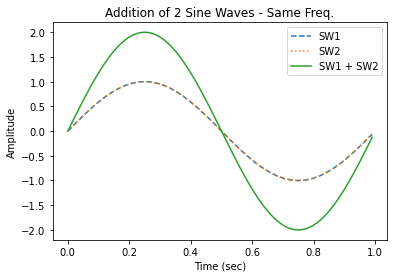

In [2]:
# ADDITIONEXAMPLE
# This script provides two examples for combining signals
# together using addition.
#
# The first example is for signals of the same frequency and
# phase.
#
# The second example is for signals of different frequencies.
#
# See also SUBTRACTIONEXAMPLE

# Example 1 - Same Frequencies
# Declare initial variables
f = 1
a = 1
phi = 0
Fs = 100
Ts = 1/Fs
t = np.arange(0, Fs) * Ts
sw1 = a * np.sin((2 * np.pi * f * t) + phi)
sw2 = a * np.sin((2 * np.pi * f * t) + phi)

N = len(sw1)
sw3 = np.zeros([N,1])
# Loop through arrays to perform element-wise addition
for n in range(N):
    sw3[n] = sw1[n] + sw2[n]

# Plot the result
plt.plot(t, sw1, '--', t, sw2, ':', t, sw3)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Addition of 2 Sine Waves - Same Freq.')
plt.legend(['SW1', 'SW2', 'SW1 + SW2'])
plt.show()

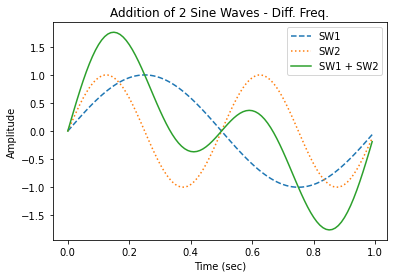

In [3]:
# Example 2 - Different frequencies
# Declare initial parameters
f = 1
a = 1
phi = 0
Fs = 100
Ts = 1/Fs
t = np.arange(0, Fs) * Ts
sw1 = a * np.sin((2 * np.pi * f * t) + phi)
sw2 = a * np.sin((2 * np.pi * (f*2) * t) + phi) # Change frequency x2

sw3 = sw1 + sw2

plt.plot(t, sw1, '--', t, sw2, ':', t, sw3)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Addition of 2 Sine Waves - Diff. Freq.')
plt.legend(['SW1', 'SW2', 'SW1 + SW2'])
plt.show()

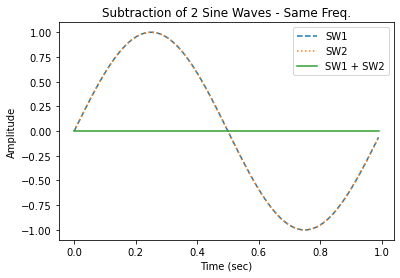

In [4]:
# SUBTRACTIONEXAMPLE
# This script provides two examples for combining signals
# together using subtraction.
#
# The first example is for signals of the same frequency and
# phase.
#
# The second example shows the addition of signals where one
# signal has a phase offset of 180 degrees (pi radians).
#
# See also ADDITIONEXAMPLE

# Example 1 - Same frequency and phase
# Declare initial parameters
f = 1
a = 1
phi = 0
Fs = 100
Ts = 1/Fs
t = np.arange(0, Fs) * Ts
sw1 = a * np.sin((2 * np.pi * f * t) + phi)
sw2 = a * np.sin((2 * np.pi * f * t) + phi)
# Element-wise subtraction
sw3 = sw2 - sw1
# Plot the result
plt.plot(t, sw1, '--', t, sw2, ':', t, sw3)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Subtraction of 2 Sine Waves - Same Freq.')
plt.legend(['SW1', 'SW2', 'SW1 + SW2'])
plt.show()

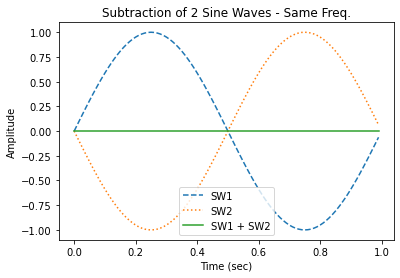

In [5]:
# Example 2 - Same frequency with a phase offset
f = 1
a = 1
phi = 0
Fs = 100
Ts = 1/Fs
t = np.arange(0, Fs) * Ts
sw1 = a * np.sin((2 * np.pi * f * t) + phi)
sw2 = a * np.sin((2 * np.pi * f * t) + np.pi) # Phase offset by 180 degrees
sw3 = sw1 + sw2

plt.plot(t, sw1, '--', t, sw2, ':', t, sw3)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Subtraction of 2 Sine Waves - Same Freq.')
plt.legend(['SW1', 'SW2', 'SW1 + SW2'])
plt.show()

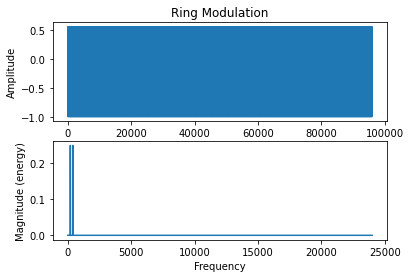

In [3]:
# RINGMODULATION
# This script demonstrates the result of performing ring
# modulation with two different frequencies.
#
# By multiplying 300 Hz with 100 Hz the result is a signal
# with two harmonics.
# 200 Hz (300 - 100) and 400 Hz (300 + 100)

# Initialize parameters
Fs = 48000
Ts = 1/Fs
lenSec = 2
N = lenSec * Fs
fHigh = 300
fLow = 100

# Synthesize signals and perform element-wise multiplication
x = np.zeros([N,1])
for n in range(N):
    t = n * Ts
    x[n][0] = np.sin(2 * np.pi * fLow * t) * np.sin(2 * np.pi * fHigh * t)

t = np.arange(0, Fs) * Ts
plt.subplot(211)
plt.plot(x)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Ring Modulation')

x = x.flatten()
plt.subplot(212)
plt.magnitude_spectrum(x, Fs=Fs)
plt.show()

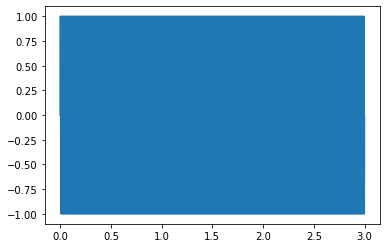

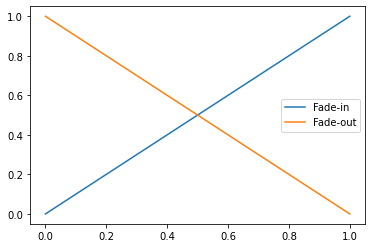

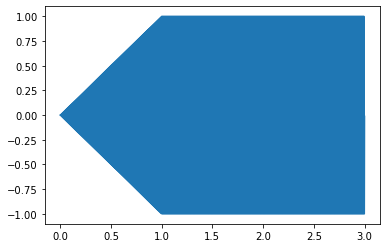

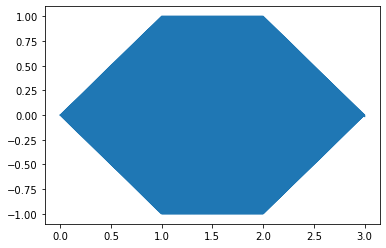

In [4]:
# LINEARFADE
# This script creates linear fades. Then the 'fade-in'
# is applied to the beginning of a sine wave signal. The
# 'fade-out' is applied to the end.
#
# See also EXPONENTIALFADE

Fs = 48000
Ts = 1/Fs
f = 100
phi = 0
t = np.arange(0, Fs*3) * Ts
x = np.sin((2 * np.pi * f * t) + phi)

plt.figure(1)
plt.plot(t, x)
plt.show()

numSamples = 1 * Fs # 1 second fade-in/out
a = np.linspace(0, 1, numSamples)
fadeIn = a
fadeOut = 1-a # Equivalent = np.linspace(1, 0, numSamples)
plt.figure(2)
plt.plot(a, fadeIn, a, fadeOut)
plt.legend(['Fade-in', 'Fade-out'])

# Fade-in
# Index samples just at the start of the signal
temp = x
temp[0:numSamples] = fadeIn * x[0:numSamples]
plt.figure(3)
plt.plot(t, temp)

# Fade-out
# Index samples just at the end of the signal
out = temp
out[-1 - numSamples: -1] = fadeOut * temp[-1 - numSamples: -1]
plt.figure(4)
plt.plot(t, out)
plt.show()

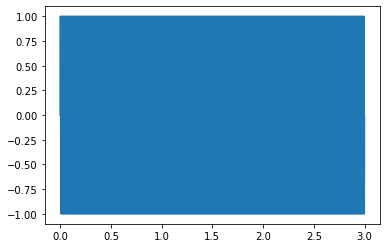

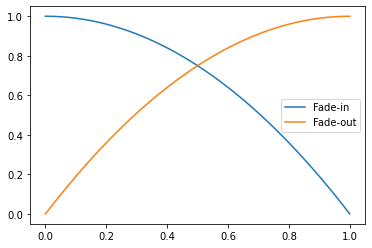

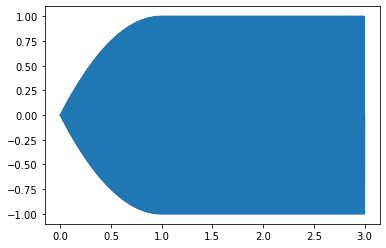

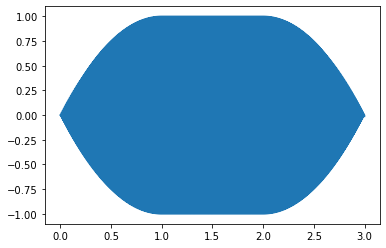

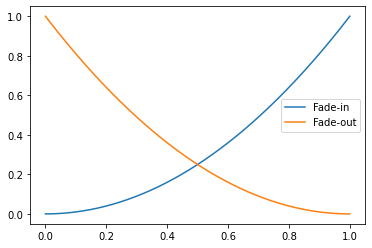

In [5]:
# EXPONENTIAL FADE
# This script creates exponential fades, both convex and
# concave examples are provided. These fades are applied
# to the beginning and end of a sine wave test signal.
#
# See also, LINEARFADE

Fs = 48000
Ts = 1/Fs
t = np.arange(0, 3*Fs) * Ts
f = 100
phi = 0
x = np.sin((2 * np.pi * f * t) + phi)
plt.figure(1)
plt.plot(t, x)

# Convex fades
numSamples = 1 * Fs # 1 second fade-in/out

# Exponent for curve
c = 2 # c can be any number > 1 (linear = 1)

a = np.linspace(0, 1, numSamples)
fadeOut = 1 - pow(a, c)

a = np.linspace(1, 0, numSamples)
fadeIn = 1 - pow(a, c)

plt.figure(2)
plt.plot(a, fadeIn, a, fadeOut)
plt.legend(['Fade-in', 'Fade-out'])

# Fade-in
temp = x
temp[0:numSamples] = fadeIn * x[0:numSamples]
plt.figure(3)
plt.plot(t, temp)

# Fade-out
out = temp
out[-1 - numSamples: -1] = fadeOut * temp[-1 - numSamples: -1]
plt.figure(4)
plt.plot(t, out)

a = np.linspace(0, 1, numSamples)
a = a.T
fadeOut = pow(a, c)

# (Alternate) concave fades
a = np.linspace(1, 0, numSamples)
a = a.T
fadeIn = pow(a, c)
plt.figure(5)
plt.plot(a, fadeIn, a, fadeOut)
plt.legend(['Fade-in', 'Fade-out'])
plt.show()

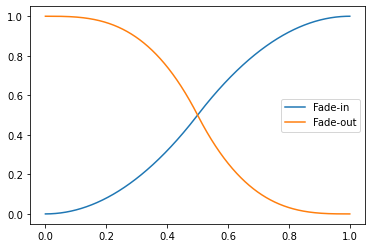

In [8]:
# SCURVEFADE
# This script demonstrates one approach to creating S-curve fades.
# This method involves concatenating a convex fade with a concave
# fade.
#
# See also LINEARFADE, EXPONENTIALFADE, SINECURVEFADE

Fs = 44100 # Arbitrary sampling rate

# S-curve fade-in
numSamples = round(1 * Fs) # 1 sec. fade, round to whole sample
halfSamples = round(numSamples/2)
a = np.linspace(0, 1, halfSamples)
x = 2 # can be any number >= 1
concave = 0.5 * pow(a, x)
convex = 0.5 * (1 - pow((1-a), x)) + 0.5
# fadeIn = np.concatenate(concave, convex)
fadeIn = np.hstack((concave, convex))

# S-curve fade-out
x = 3 # can be any number >= 1
convex = 0.5 * (1 - pow(a, x)) + 0.5
concave = 0.5 * pow(1 - a, x)
# fadeOut = np.concatenate(convex, concave)
fadeOut = np.hstack((convex, concave))

# Plot the S-curve
t = np.linspace(0, 1, numSamples)
plt.plot(t, fadeIn, t, fadeOut)
plt.legend(['Fade-in', 'Fade-out'])
plt.show()

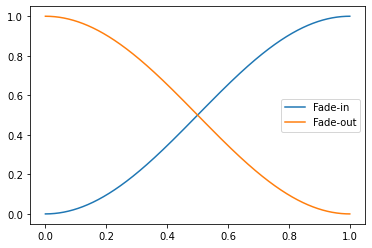

In [9]:
# SINECURVEFADE
# This script demonstrates one approach to creating S-curve fades.
# This method involves using the sine function.
#
# See also, LINEARFADE, EXPONENTIALFADE, SCURVEFADE

Fs = 44100 # Arbitrary sampling rate
Ts = 1/Fs
# S-curve fade-in
lenSec = 1 # 1 second fade-in/out
N = round(lenSec * Fs) # Convert to whole # of samples
t = np.arange(0, N) * Ts

# The S-curve fade is half a cycle of a sine wave. If
# fade is 1 sec., period of sine wave is 2 sec.
period = 2 * N * Ts # units of seconds
freq = 1/period # units of Hz
fadeIn = 0.5 * np.sin((2 * np.pi * freq * t) - np.pi/2) + 0.5
# S-curve fade-out
fadeOut = 0.5 * np.sin((2 * np.pi * freq * t) + np.pi/2) + 0.5

# Plot the S-curve
plt.plot(t, fadeIn, t, fadeOut)
plt.legend(['Fade-in', 'Fade-out'])
plt.show()

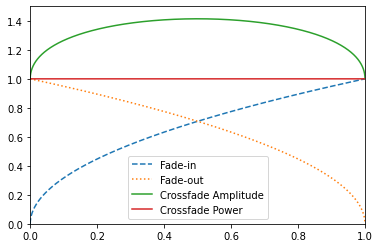

In [10]:
# EQUALFADES
# This script analyzes an exponential crossfade for
# 'equal amplitude' or 'equal power'.

Fs = 44100

# Square-root fades
x = 2 # can be any number >= 2
numSamples = 1 * Fs # 1 second fade-in/out
aIn = np.linspace(0, 1, numSamples)
fadeIn = pow(aIn, 1/x)

aOut = np.linspace(1, 0, numSamples)
aOut = aOut.T
fadeOut = pow(aOut, 1/x)

# Compare amplitude vs. power of crossfade
plt.plot(aIn, fadeIn, '--', aIn, fadeOut, ':', aIn, fadeIn + fadeOut, aIn, (pow(fadeIn, 2) + pow(fadeOut, 2)))
plt.axis([0, 1, 0, 1.5])
plt.legend(['Fade-in', 'Fade-out', 'Crossfade Amplitude', 'Crossfade Power'])
plt.show()

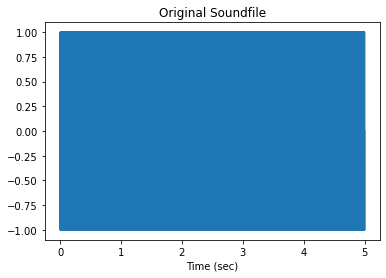

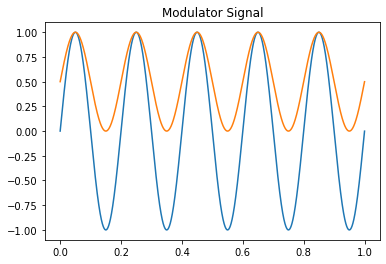

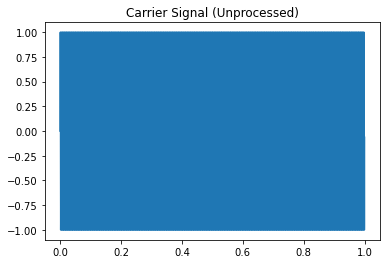

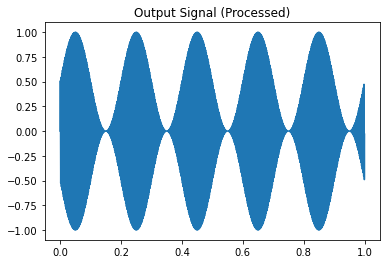

In [13]:
# AMPMODULATION
# This script provides an example for modulating the amplitude
# of a carrier signal. this process is called tremolo when used
# as an audio effect.

# Import carrier signal
[carrier, Fs] = soundfile.read('sw440.wav')
Ts = 1/Fs
N = len(carrier)
t = np.arange(0, N) * Ts

plt.plot(t, carrier)
plt.title('Original Soundfile')
plt.xlabel('Time (sec)')
plt.figure()

# Tremolo parameters
depth = 100 # [0,100]
speed = 5
amp = 0.5 * (depth / 100)
offset = 1 - amp

# Synthesize modulation signal
f = speed # speed of effect
phi = 0
sw = np.sin(2 * np.pi * f * t + phi)

mod = (amp * sw) + offset

# Plot to compare the original sine wave with the modulator
# Index only the first second of signal for visualization purposes
plt.plot(t[0:Fs], sw[0:Fs], t[0:Fs], mod[0:Fs])
plt.title('Modulator Signal')
plt.figure()

# Modulate the amplitude of the carrier by the modulator
output = carrier * mod

# Plot the output and listen to the result
plt.plot(t[0:Fs], carrier[0:Fs])
plt.title('Carrier Signal (Unprocessed)')
plt.figure()
plt.plot(t[0:44100], output[0:44100])
plt.title('Output Signal (Processed)')
plt.show()
Audio(output, rate=Fs)

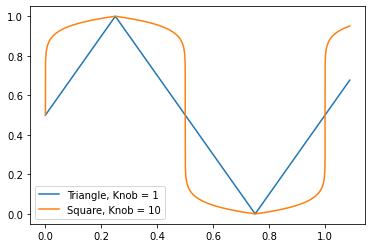

In [15]:
# MORPHLFO
# This script demonstrates the method of morphing the LFO signal
# for the tremolo effect from a triangle wave to a square wave.
#
# See also AMPMODULATION

# Initial parameters
Fs = 48000
Ts = 1/Ts
f = 1 # 1 Hz LFO
numSec = 1
numSamples = Fs * numSec
t = np.arange(0, numSamples) * Ts

# Consider a parameter knob with values from 1-10
knobValue = 10
lfo = signal.sawtooth(((2 * np.pi * f * t) + np.pi/2), 0.5)
N = len(lfo)
lfoShape = np.zeros(N)
for n in range(N):
    if lfo[n] >= 0:
        # This process is similar to adding an exponent
        # to a linear fade. It turns into an exponential,
        # convex curve. In this case, it turns the straight
        # line of a triangle wave into a curve closer to a
        # square wave.
        lfoShape[n] = pow(lfo[n], (1/knobValue))

    else:
        # Need to avoid using negative numbers with power function
        lfoShape[n] = -1 * pow(np.abs(lfo[n]), (1/knobValue))


plt.plot(t, (0.5*lfo)+0.5, t, (0.5*lfoShape)+0.5)
plt.legend(['Triangle, Knob = 1', 'Square, Knob = 10'])
plt.show()
